# **The objective of this project is to analyze the performance of Chase Bank branches across the United States, identifying trends, opportunities, and areas for improvement. The analysis aims to provide insights that will inform business strategies and optimize branch operations.**

In [1]:
#Getting File Directory/Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-deposits/database.csv


In [2]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Dataset
data = pd.read_csv("/kaggle/input/bank-deposits/database.csv")

In [4]:
# Taking a look at the dataset
data.head()

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


# *Data Cleaning and Preprocessing*

In [5]:
# Checking For Missing Values
data.isnull().sum()

Institution Name       0
Main Office            0
Branch Name            0
Branch Number          0
Established Date       0
Acquired Date       1615
Street Address         0
City                   0
County                 0
State                  0
Zipcode                0
Latitude              66
Longitude             66
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

Out of the total number of branches in the dataset, 1615 branches do not have an 'Acquired Date' recorded.
This could be because:

- These branches were not acquired (they were newly established)
- The acquisition date is not applicable (e.g., the branch was never acquired)
- The data is missing or not available

For this issue, i assume that these branches were newly established and as such, i proceed to impute the missing values with 'NA'.

In [6]:
# Imputing the 'Established Date' value for the missing 'Acquired Date' values.
data['Acquired Date'] = data['Acquired Date'].fillna('NA')

In [7]:
# Checking Imputation
data.isnull().sum()

Institution Name      0
Main Office           0
Branch Name           0
Branch Number         0
Established Date      0
Acquired Date         0
Street Address        0
City                  0
County                0
State                 0
Zipcode               0
Latitude             66
Longitude            66
2010 Deposits       740
2011 Deposits       578
2012 Deposits       329
2013 Deposits       175
2014 Deposits        56
2015 Deposits        19
2016 Deposits         0
dtype: int64

'Acquired Date' missing value issue resolved :)

There are 66 missing values in the 'Latitude' and 'Longitude' columns; i assume the following possibilities for the issue:
1. New or unlocated branches
2. Data entry errors
3. Limitations in geolocation data sources

And to resolve it, i proceed to replace the missing values with 'N/A' (meaning 'Not Available')


In [8]:
# Imputing 'NA' for the missing 'Latitude and Longitude' values.
data['Latitude'] = data['Latitude'].fillna("NA")
data['Longitude'] = data['Longitude'].fillna("NA")

In [9]:
# Re-Checking Imputation
data.isnull().sum()

Institution Name      0
Main Office           0
Branch Name           0
Branch Number         0
Established Date      0
Acquired Date         0
Street Address        0
City                  0
County                0
State                 0
Zipcode               0
Latitude              0
Longitude             0
2010 Deposits       740
2011 Deposits       578
2012 Deposits       329
2013 Deposits       175
2014 Deposits        56
2015 Deposits        19
2016 Deposits         0
dtype: int64

There are 1,897 missing values across six columns ranging for deposits for year 2010 to 2015.

I assume the following as to why there are missing values in these columns:

i. Data collection issues

ii. Changes in data sources

iii. Mergers and acquisitions:

iv. Data entry errors
	
For this issue, I proceed to fill the missing values with the median value [since it is a play 	project].


In [10]:
# Select the Deposits columns
deposits_cols = [col for col in data.columns if 'Deposits' in col]

# Impute missing values for all Deposits columns
for col in deposits_cols:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

In [11]:
# Re-checking Imputation
data.isnull().sum()

Institution Name    0
Main Office         0
Branch Name         0
Branch Number       0
Established Date    0
Acquired Date       0
Street Address      0
City                0
County              0
State               0
Zipcode             0
Latitude            0
Longitude           0
2010 Deposits       0
2011 Deposits       0
2012 Deposits       0
2013 Deposits       0
2014 Deposits       0
2015 Deposits       0
2016 Deposits       0
dtype: int64

All issues resolved :)

# *Data type verification and normalization*

To ensure the quality and consistency of the data and verify that it is in the correct format and meets the expected standards, I perform the following:

**# DATA PROFILING**

In [12]:
# Data Types
print(data.dtypes)

Institution Name     object
Main Office           int64
Branch Name          object
Branch Number         int64
Established Date     object
Acquired Date        object
Street Address       object
City                 object
County               object
State                object
Zipcode               int64
Latitude             object
Longitude            object
2010 Deposits       float64
2011 Deposits       float64
2012 Deposits       float64
2013 Deposits       float64
2014 Deposits       float64
2015 Deposits       float64
2016 Deposits         int64
dtype: object


In [13]:
# Converting all Deposits columns to int64
# Select the Deposits columns
deposits_cols = [col for col in data.columns if 'Deposits' in col]

# Convert all Deposits columns to int64
data[deposits_cols] = data[deposits_cols].astype(int)

In [14]:
# Re-checking Data Types
print(data.dtypes)

Institution Name    object
Main Office          int64
Branch Name         object
Branch Number        int64
Established Date    object
Acquired Date       object
Street Address      object
City                object
County              object
State               object
Zipcode              int64
Latitude            object
Longitude           object
2010 Deposits        int64
2011 Deposits        int64
2012 Deposits        int64
2013 Deposits        int64
2014 Deposits        int64
2015 Deposits        int64
2016 Deposits        int64
dtype: object


In [15]:
# Data Range (only for numerical columns)
numerical_cols = data.select_dtypes(include=[np.number])
print(numerical_cols.min())
print(numerical_cols.max())

Main Office         0
Branch Number       0
Zipcode          2110
2010 Deposits       0
2011 Deposits       0
2012 Deposits       0
2013 Deposits       0
2014 Deposits       0
2015 Deposits       0
2016 Deposits       0
dtype: int64
Main Office               1
Branch Number          7989
Zipcode               99362
2010 Deposits     633131000
2011 Deposits     743268000
2012 Deposits     832455000
2013 Deposits     916543000
2014 Deposits    1032549000
2015 Deposits    1069425000
2016 Deposits    1155185000
dtype: int64


In [16]:
# Data Uniqueness
print(data.duplicated().sum())

0


No value is duplicated :)

Good to move on

# *Date format standardization*

In [17]:
# Select date columns
date_cols = [col for col in data.columns if 'Date' in col]

# Standardize date formats
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

/tmp/ipykernel_18/64400632.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [18]:
# Confirming standardization
print(data.dtypes)

Institution Name            object
Main Office                  int64
Branch Name                 object
Branch Number                int64
Established Date    datetime64[ns]
Acquired Date       datetime64[ns]
Street Address              object
City                        object
County                      object
State                       object
Zipcode                      int64
Latitude                    object
Longitude                   object
2010 Deposits                int64
2011 Deposits                int64
2012 Deposits                int64
2013 Deposits                int64
2014 Deposits                int64
2015 Deposits                int64
2016 Deposits                int64
dtype: object


Standardization confirmed!

Good to go

# *Exploratory Data Analysis*

In [19]:
# Getting Summary Statistics
data.describe()

,Main Office,Branch Number,Established Date,Acquired Date,Zipcode,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
count,5413.000000,5413.000000,5413,3798,5413.000000,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03,5.413000e+03
mean,0.000185,4303.761685,1978-05-08 15:12:12.237206752,2005-07-09 10:52:30.710900352,58800.016072,2.362713e+05,2.760633e+05,3.066684e+05,3.366706e+05,3.785973e+05,3.923467e+05,4.268188e+05
min,0.000000,0.000000,1800-01-01 00:00:00,1975-01-18 00:00:00,2110.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,2548.000000,1962-03-23 00:00:00,2004-11-13 00:00:00,33334.000000,2.545300e+04,2.566800e+04,2.607700e+04,2.746500e+04,2.963500e+04,3.396000e+04,3.951300e+04
50%,0.000000,4274.000000,1989-04-30 00:00:00,2004-11-13 00:00:00,60654.000000,4.307200e+04,4.442600e+04,4.717300e+04,5.041500e+04,5.450300e+04,6.013300e+04,6.815700e+04
75%,0.000000,6172.000000,2006-10-26 00:00:00,2008-09-25 00:00:00,89102.000000,7.429800e+04,7.872000e+04,8.559000e+04,9.307600e+04,1.014350e+05,1.114780e+05,1.243180e+05
max,1.000000,7989.000000,2016-05-24 00:00:00,2011-10-14 00:00:00,99362.000000,6.331310e+08,7.432680e+08,8.324550e+08,9.165430e+08,1.032549e+09,1.069425e+09,1.155185e+09
std,0.013592,2146.930304,NaN,NaN,30863.015686,8.890869e+06,1.049867e+07,1.173961e+07,1.290939e+07,1.453742e+07,1.504738e+07,1.632941e+07


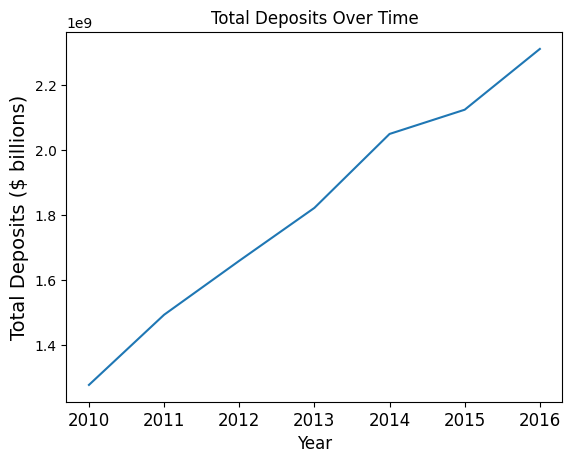

In [20]:
# Analyzing overall performance of branches in terms of deposits
import matplotlib.pyplot as plt

total_deposits = data[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']].sum()

plt.plot(total_deposits)
plt.title('Total Deposits Over Time')
plt.xlabel('Year',  fontsize=12)
plt.ylabel('Total Deposits ($ billions)', fontsize=14)
plt.xticks(range(7), ['2010', '2011', '2012', '2013', '2014', '2015', '2016'], fontsize=12)
plt.show()

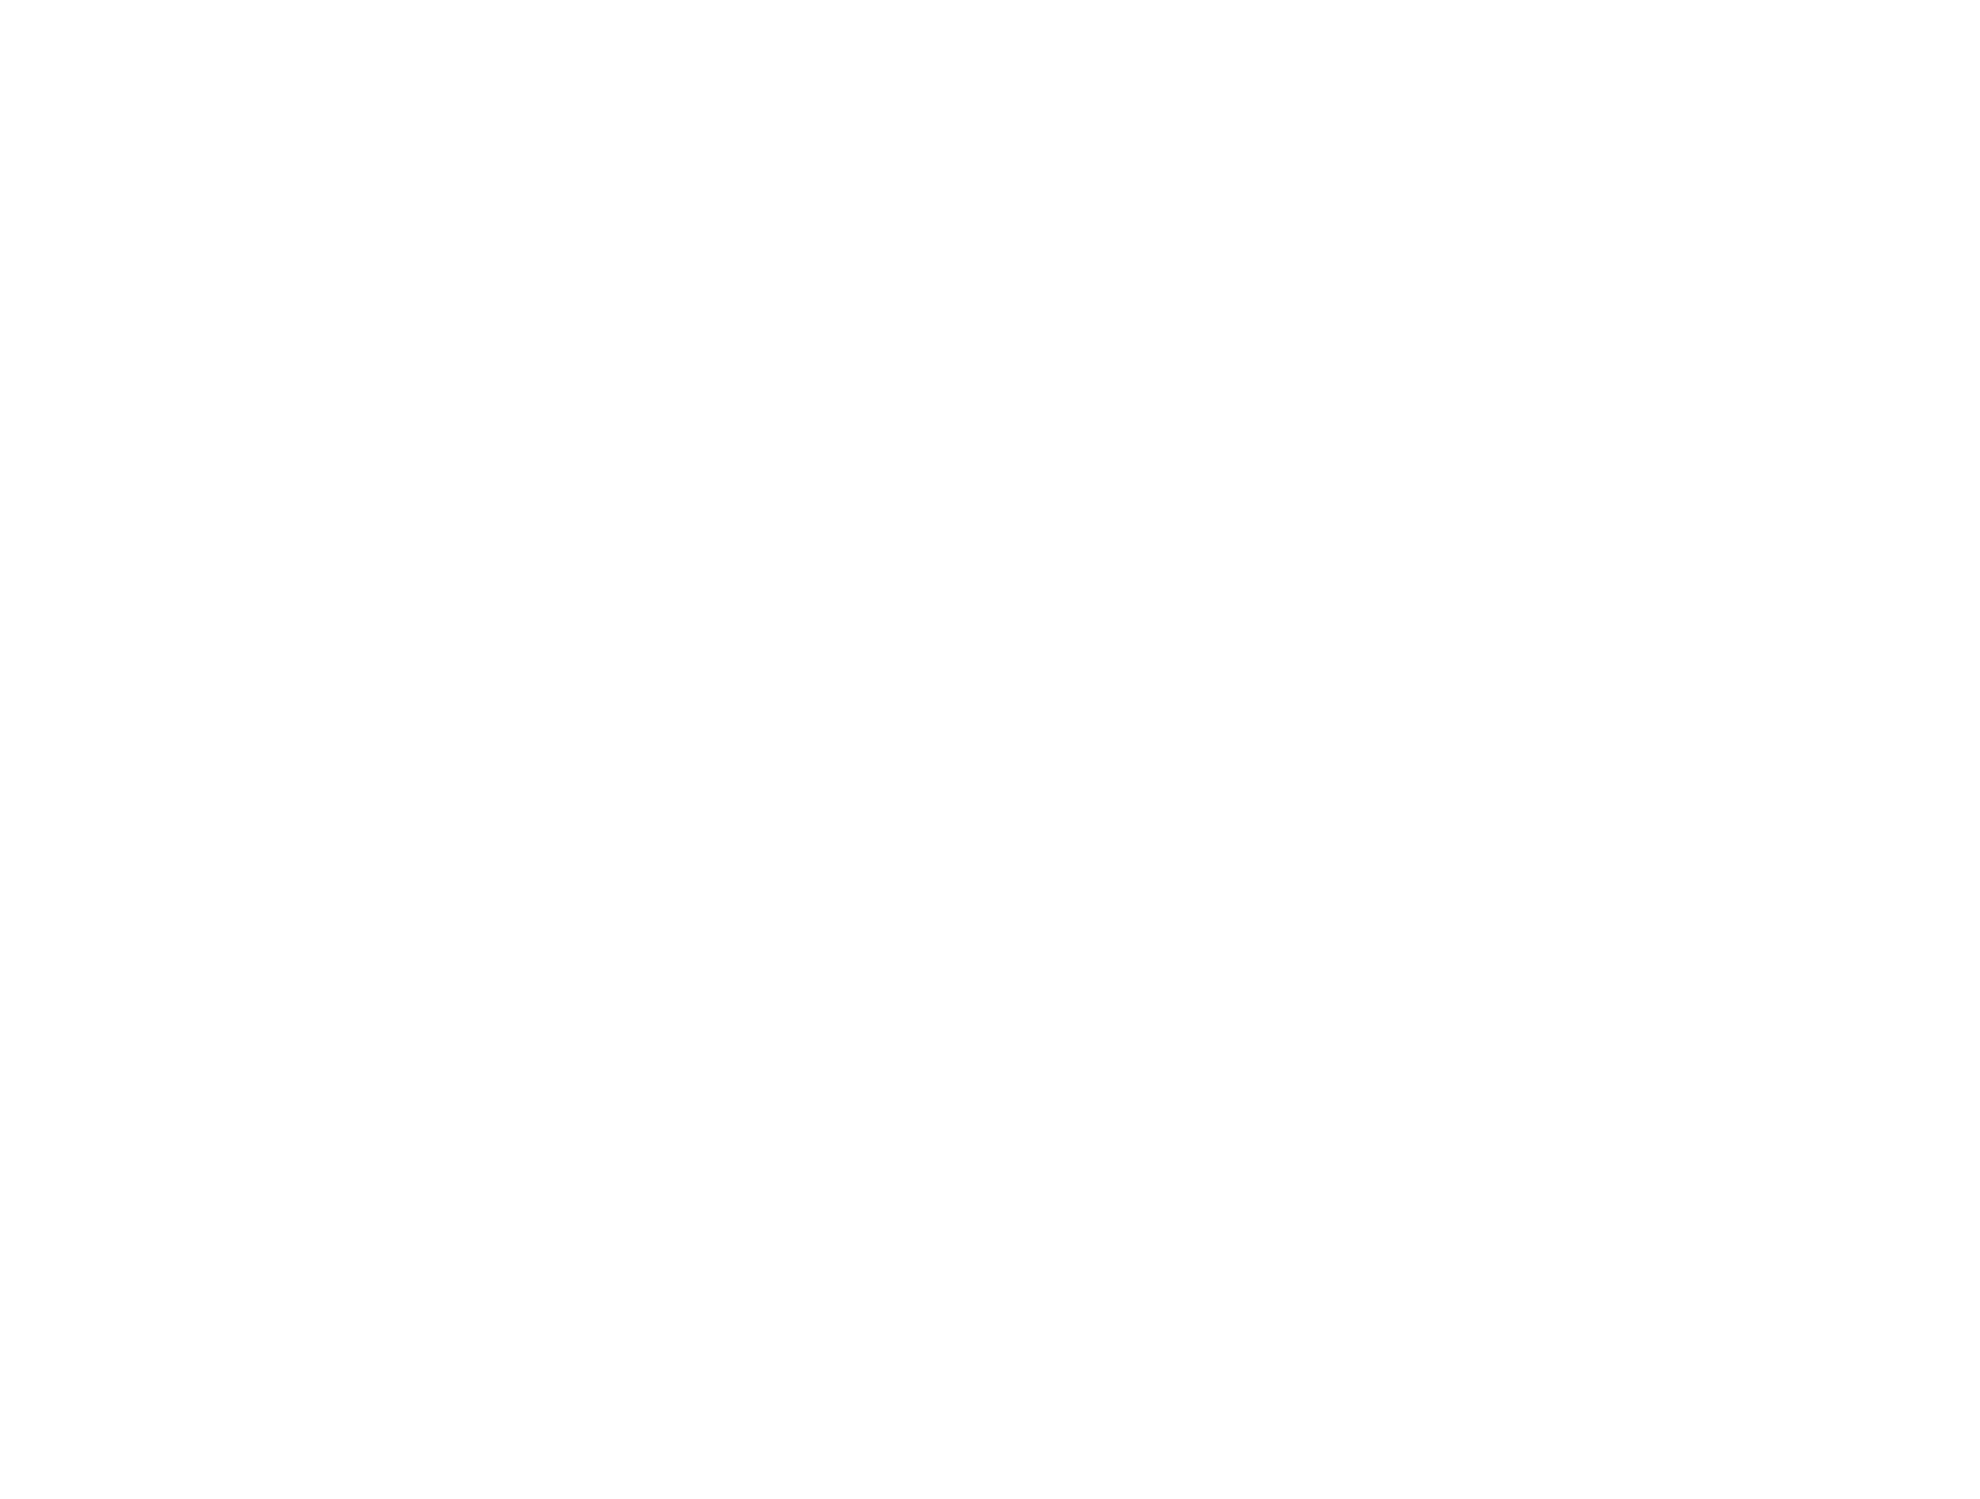

<Figure size 640x480 with 0 Axes>

In [21]:
# Saving the plot as output
from IPython.display import Image
plt.savefig('total_deposits_over_time.png', dpi=300, bbox_inches='tight')
Image(filename='total_deposits_over_time.png')

**Annual Top-10 Branches (By Deposit)**

In [22]:
def top_10_branches(year):
  total_deposits = data[f'{year} Deposits']
  ranked_branches = data.sort_values(by=f'{year} Deposits', ascending=False)[['Branch Name', f'{year} Deposits']]
  return ranked_branches.head(10)

print(top_10_branches(2010))
print(top_10_branches(2011))
print(top_10_branches(2012))
print(top_10_branches(2013))
print(top_10_branches(2014))
print(top_10_branches(2015))
print(top_10_branches(2016))

                            Branch Name  2010 Deposits
0       JPMorgan Chase Bank Main Office      633131000
2224         Madison and 48th St Branch      153577328
154      Madison Ave Abd 48th St Branch       45099076
395                 Houston Main Office       26356388
819        Chicago's Main Office Branch       22101086
2738  Dallas Main Banking Center Branch       15209318
1401                Detroit Main Branch        6953356
2138           Broad St Downtown Branch        4916291
938             Baton Rouge Main Branch        4301756
1234                 Chase Tower Branch        4246556
                                           Branch Name  2011 Deposits
0                      JPMorgan Chase Bank Main Office      743268000
2224                        Madison and 48th St Branch      194388000
154                     Madison Ave Abd 48th St Branch       62630984
395                                Houston Main Office       36991358
819                       Chicago's Main Offi

**Overall Top-Performing Branches**

In [23]:
# Calculate total deposits across all years for each branch
total_deposits_all_years = data[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']].sum(axis=1)

# Add the total deposits to the original data
data['Total Deposits'] = total_deposits_all_years

# Rank branches by total deposits across all years
ranked_branches_overall = data.sort_values(by='Total Deposits', ascending=False)[['Branch Name', 'Total Deposits']]

# Print the top 10 branches overall
print(ranked_branches_overall.head(10))


                                           Branch Name  Total Deposits
0                      JPMorgan Chase Bank Main Office      6382556000
2224                        Madison and 48th St Branch      1595248852
154                     Madison Ave Abd 48th St Branch       526804232
395                                Houston Main Office       355358376
819                       Chicago's Main Office Branch       251964626
2738                 Dallas Main Banking Center Branch       155512692
1401                               Detroit Main Branch       100486403
2138                          Broad St Downtown Branch        45665685
4639  Fifth Avenue & 44th Street Banking Center Branch        39783307
1234                                Chase Tower Branch        39524482


**Overall Least Performing Branches (By Deposit)**

In [24]:
# Calculating total deposits across all years for each branch
total_deposits_all_years = data[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']].sum(axis=1)

# Adding the total deposits to the original data
data['Total Deposits'] = total_deposits_all_years

# Ranking branches by total deposits across all years
ranked_branches_overall = data.sort_values(by='Total Deposits', ascending=True)[['Branch Name', 'Total Deposits']]

# Print the top 10 branches overall
print(ranked_branches_overall.head(136))

                               Branch Name  Total Deposits
438   Bay Area Boulevard Motor Bank Branch               0
575    Westminister Thurber Ret Ctr Branch               0
951           Youree South Drive-Up Branch               0
1701        South Meridian Drive-Up Branch               0
1109     Detached Drive-In Facility Branch               0
...                                    ...             ...
453         Park Central Motor Bank Branch               0
370        Upper Montclair Drive-In Branch               0
371    Cs First Boston Corp Cashier Branch               0
861           Wheaton Main Drive-Up Branch               0
466               Quarum Motor Bank Branch               0

[136 rows x 2 columns]


**Branch Establishment And Acquisition Trend**

In [25]:
# Establishment and Acquisition dates columns
trend = data.sort_values(by = 'Established Date',ascending=True)[['Established Date', 'Acquired Date']]
trend

,Established Date,Acquired Date
204,1800-01-01,1996-07-14
225,1800-01-01,1996-07-14
226,1800-01-01,1996-07-14
213,1800-01-01,1996-07-14
212,1800-01-01,1996-07-14
...,...,...
5409,2016-02-02,NaT
5410,2016-03-15,NaT
5405,2016-04-26,NaT
5406,2016-05-10,NaT


In [26]:
first_est = data['Established Date']
first_est.head(1)

0   1824-01-01
Name: Established Date, dtype: datetime64[ns]

In [27]:
last_est = data['Established Date']
last_est.tail(1)

5412   2016-01-01
Name: Established Date, dtype: datetime64[ns]

In [28]:
# Getting First Acquisition Date
first_acquisition_date = data['Acquired Date'].dropna().min()

print("First Acquisition Date:", first_acquisition_date)

First Acquisition Date: 1975-01-18 00:00:00


In [29]:
#Getting Last Acquisition Date
last_acquisition_date = data['Acquired Date'].dropna().max()

print("Last Acquisition Date:", last_acquisition_date)

Last Acquisition Date: 2011-10-14 00:00:00


**Visualizations**

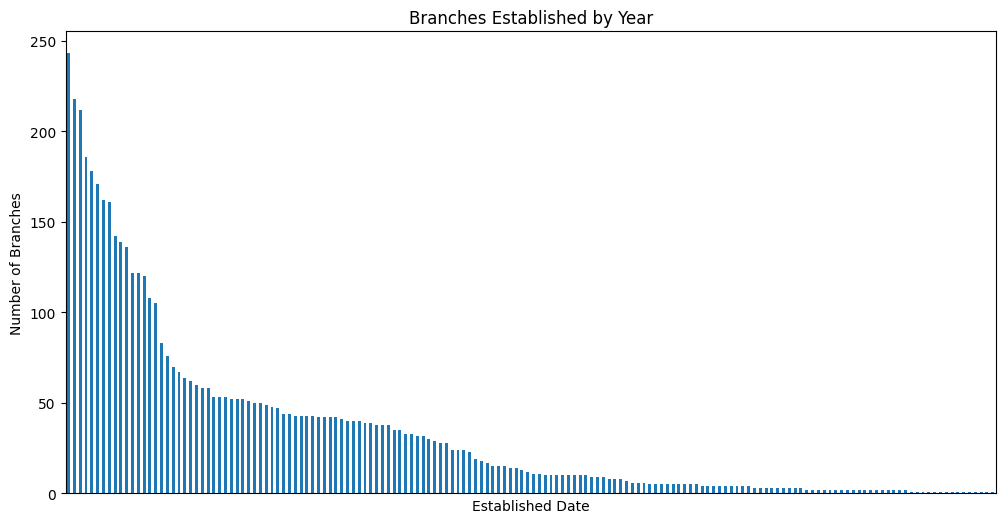

In [30]:
plt.figure(figsize=(12,6))  # Set the figure size to 12 inches wide and 6 inches high
data['Established Date'].dt.year.value_counts().plot(kind='bar')
plt.title("Branches Established by Year")
plt.ylabel("Number of Branches")
plt.xticks([])  # Remove x-axis labels
plt.savefig('branches_established_by_year.png')
plt.show()

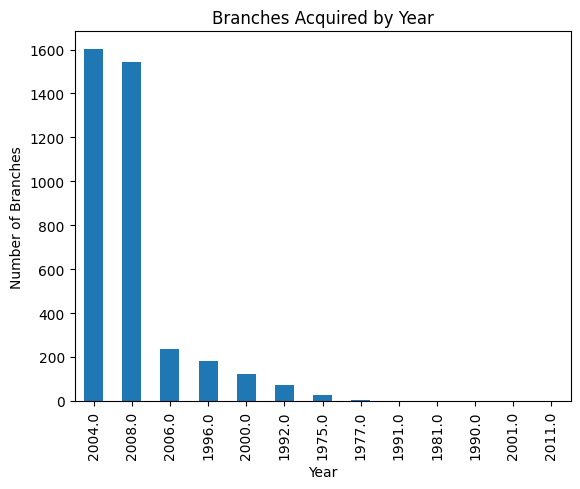

In [31]:
data['Acquired Date'].dt.year.value_counts().plot(kind='bar')
plt.title("Branches Acquired by Year")
plt.xlabel("Year")
plt.ylabel("Number of Branches")
plt.savefig('branches_acquired_by_year.png')
plt.show()